In [25]:
import numpy as np
import pandas as pd
from sodapy import Socrata
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [24]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [5]:
dt.datetime.now()

datetime.datetime(2023, 3, 20, 10, 7, 23, 271293)

In [6]:
x = dt.datetime(2020, 5, 17)

In [7]:
print (x)

2020-05-17 00:00:00


In [8]:
date_object = dt.date.today()
print(date_object)

2023-03-20


In [9]:
timestamp = dt.date.fromtimestamp(1)
print("Date =", timestamp)

Date = 1969-12-31


In [10]:
a = dt.datetime(2017, 11, 28, 23, 55, 59, 342380)
print("year =", a.year)
print("month =", a.month)
print("hour =", a.hour)
print("minute =", a.minute)
print("timestamp =", a.timestamp())


year = 2017
month = 11
hour = 23
minute = 55
timestamp = 1511931359.34238


In [11]:
print (dt.date.today()-dt.date(year = 2017, month = 12, day = 23))

1913 days, 0:00:00


In [12]:
now=dt.datetime.now()

In [13]:
print (now.month, now.day, now.year)

3 20 2023


In [14]:
yesterday = now.day-1

In [15]:
yesterday_datetime= dt.datetime(now.year, now.month, yesterday)

In [16]:
yesterday_datetime

datetime.datetime(2023, 3, 19, 0, 0)

In [18]:
date_string = "21 June, 2018"
print("date_string =", date_string)

date_object = dt.datetime.strptime(date_string, "%d %B, %Y")
print("date_object =", date_object)

date_string = 21 June, 2018
date_object = 2018-06-21 00:00:00


In [20]:
import pytz
tz_London = pytz.timezone('Europe/London')
datetime_London = dt.datetime.now(tz_London)
print("London:", datetime_London.strftime("%m/%d/%Y, %H:%M:%S"))

London: 03/20/2023, 14:09:46


In [26]:
clientNYgov = Socrata('data.ny.gov', '5aDY21HsXXuhyCmjUSPBkZWSN')

In [180]:
data=requests.get('https://data.cityofnewyork.us/resource/erm2-nwe9.json?$select=created_date,complaint_type,city,status, latitude, longitude&$where=created_date>="2023-02-15"').json()
df=pd.DataFrame.from_records(data)

df

,created_date,complaint_type,city,status,latitude,longitude
0,2023-03-19T12:00:00.000,Derelict Vehicles,BRONX,Open,40.84396700689029,-73.84970466421375
1,2023-03-19T12:00:00.000,Derelict Vehicles,BRONX,Open,40.838830897919955,-73.86001250475022
2,2023-03-19T12:00:00.000,Derelict Vehicles,BROOKLYN,Open,40.58978639138995,-73.96912211322424
3,2023-03-19T02:09:06.000,Noise - Residential,NEW YORK,In Progress,40.851763233654815,-73.92787988440995
4,2023-03-19T02:08:23.000,Noise - Residential,NEW YORK,In Progress,40.78087722471088,-73.94644051851448
...,...,...,...,...,...,...
995,2023-03-18T23:05:27.000,Noise - Residential,BROOKLYN,Closed,40.584084143766965,-73.9336304474601
996,2023-03-18T23:05:00.000,Noise,BROOKLYN,Open,40.682995891238285,-73.90673207041031
997,2023-03-18T23:04:39.000,Green Taxi Complaint,NaN,In Progress,40.80437580929752,-73.93742023722204
998,2023-03-18T23:04:33.000,Illegal Parking,NEW YORK,Closed,40.74156021547866,-74.0026740479293


In [181]:
#df.to_csv('311.csv')
df.info()
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_date    1000 non-null   object
 1   complaint_type  1000 non-null   object
 2   city            970 non-null    object
 3   status          1000 non-null   object
 4   latitude        998 non-null    object
 5   longitude       998 non-null    object
dtypes: object(6)
memory usage: 47.0+ KB


In [182]:
df['date']  = pd.to_datetime(df['created_date'])


In [183]:
df.head(3)

,created_date,complaint_type,city,status,latitude,longitude,date
0,2023-03-19T12:00:00.000,Derelict Vehicles,BRONX,Open,40.843967,-73.849705,2023-03-19 12:00:00
1,2023-03-19T12:00:00.000,Derelict Vehicles,BRONX,Open,40.838831,-73.860013,2023-03-19 12:00:00
2,2023-03-19T12:00:00.000,Derelict Vehicles,BROOKLYN,Open,40.589786,-73.969122,2023-03-19 12:00:00


In [184]:
df['hour'] = df['date'].dt.strftime('%H')
 

In [185]:
df

,created_date,complaint_type,city,status,latitude,longitude,date,hour
0,2023-03-19T12:00:00.000,Derelict Vehicles,BRONX,Open,40.843967,-73.849705,2023-03-19 12:00:00,12
1,2023-03-19T12:00:00.000,Derelict Vehicles,BRONX,Open,40.838831,-73.860013,2023-03-19 12:00:00,12
2,2023-03-19T12:00:00.000,Derelict Vehicles,BROOKLYN,Open,40.589786,-73.969122,2023-03-19 12:00:00,12
3,2023-03-19T02:09:06.000,Noise - Residential,NEW YORK,In Progress,40.851763,-73.927880,2023-03-19 02:09:06,02
4,2023-03-19T02:08:23.000,Noise - Residential,NEW YORK,In Progress,40.780877,-73.946441,2023-03-19 02:08:23,02
...,...,...,...,...,...,...,...,...
995,2023-03-18T23:05:27.000,Noise - Residential,BROOKLYN,Closed,40.584084,-73.933630,2023-03-18 23:05:27,23
996,2023-03-18T23:05:00.000,Noise,BROOKLYN,Open,40.682996,-73.906732,2023-03-18 23:05:00,23
997,2023-03-18T23:04:39.000,Green Taxi Complaint,NaN,In Progress,40.804376,-73.937420,2023-03-18 23:04:39,23
998,2023-03-18T23:04:33.000,Illegal Parking,NEW YORK,Closed,40.741560,-74.002674,2023-03-18 23:04:33,23


In [189]:
yourdate = parser.parse(df['created_date'].loc[0])
yourdate.hour

12

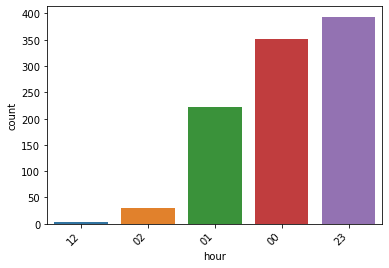

In [190]:
sns.countplot(data=df, x='hour')
plt.xticks(rotation=45, ha='right')
plt.show()

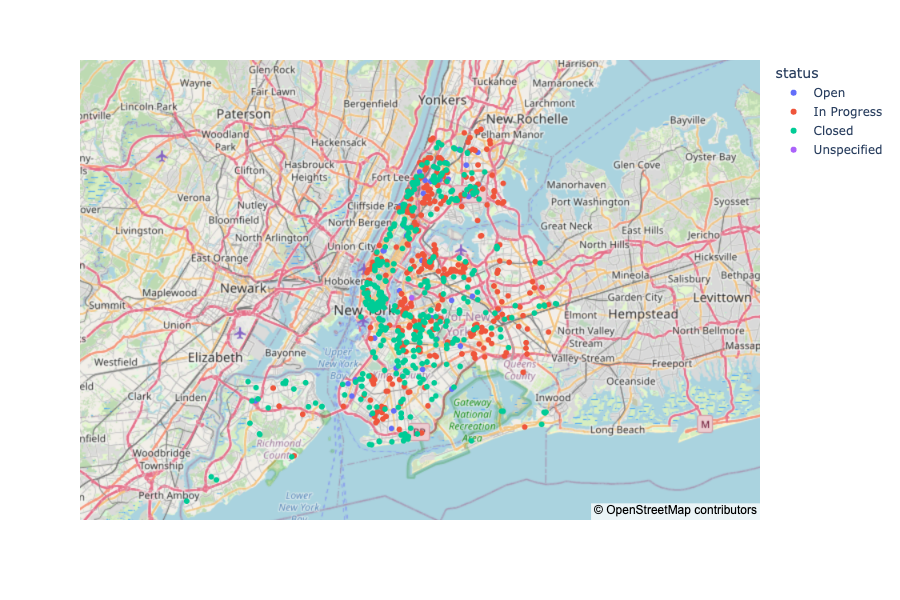

In [191]:
import plotly.express as px

color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        hover_data=["city", "complaint_type"],
                        color="status",
                        color_continuous_scale=color_scale,
                        zoom=9,
                        height=600,
                        width=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [33]:
import geopandas as gpd
from geopy import distance

In [28]:
pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
Rockefeller = (-73.9, 40.76)
Battery = (-74.01, 40.7)
print(distance.distance(Rockefeller, Battery).miles)

7.714776137498569


In [38]:
nyc = gpd.read_file('data/NYC.geojson')
nyc

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
1,2,4,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904872,"POLYGON ((-73.80379 40.77562, -73.80099 40.775..."
2,3,4,Queens,081,QN27,East Elmhurst,1.972695e+07,19816.684690,"POLYGON ((-73.86110 40.76367, -73.85993 40.762..."
3,4,4,Queens,081,QN07,Hollis,2.288777e+07,20976.335781,"POLYGON ((-73.75726 40.71815, -73.75589 40.716..."
4,5,3,Brooklyn,047,BK25,Homecrest,2.999197e+07,27514.022918,"POLYGON ((-73.95859 40.61041, -73.95828 40.608..."
...,...,...,...,...,...,...,...,...,...
190,191,3,Brooklyn,047,BK93,Starrett City,1.159899e+07,17414.583759,"MULTIPOLYGON (((-73.88829 40.64673, -73.88829 ..."
191,192,3,Brooklyn,047,BK73,North Side-South Side,2.887016e+07,28149.966570,"POLYGON ((-73.95814 40.72441, -73.95772 40.724..."
192,193,3,Brooklyn,047,BK90,East Williamsburg,3.913247e+07,49246.973666,"POLYGON ((-73.92406 40.71412, -73.92404 40.714..."
193,194,1,Manhattan,061,MN21,Gramercy,7.526893e+06,12096.842973,"POLYGON ((-73.97854 40.73690, -73.97858 40.736..."


<AxesSubplot:>

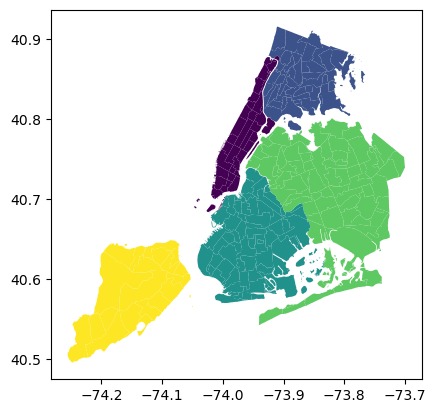

In [39]:
nyc.plot(column='BoroCode')